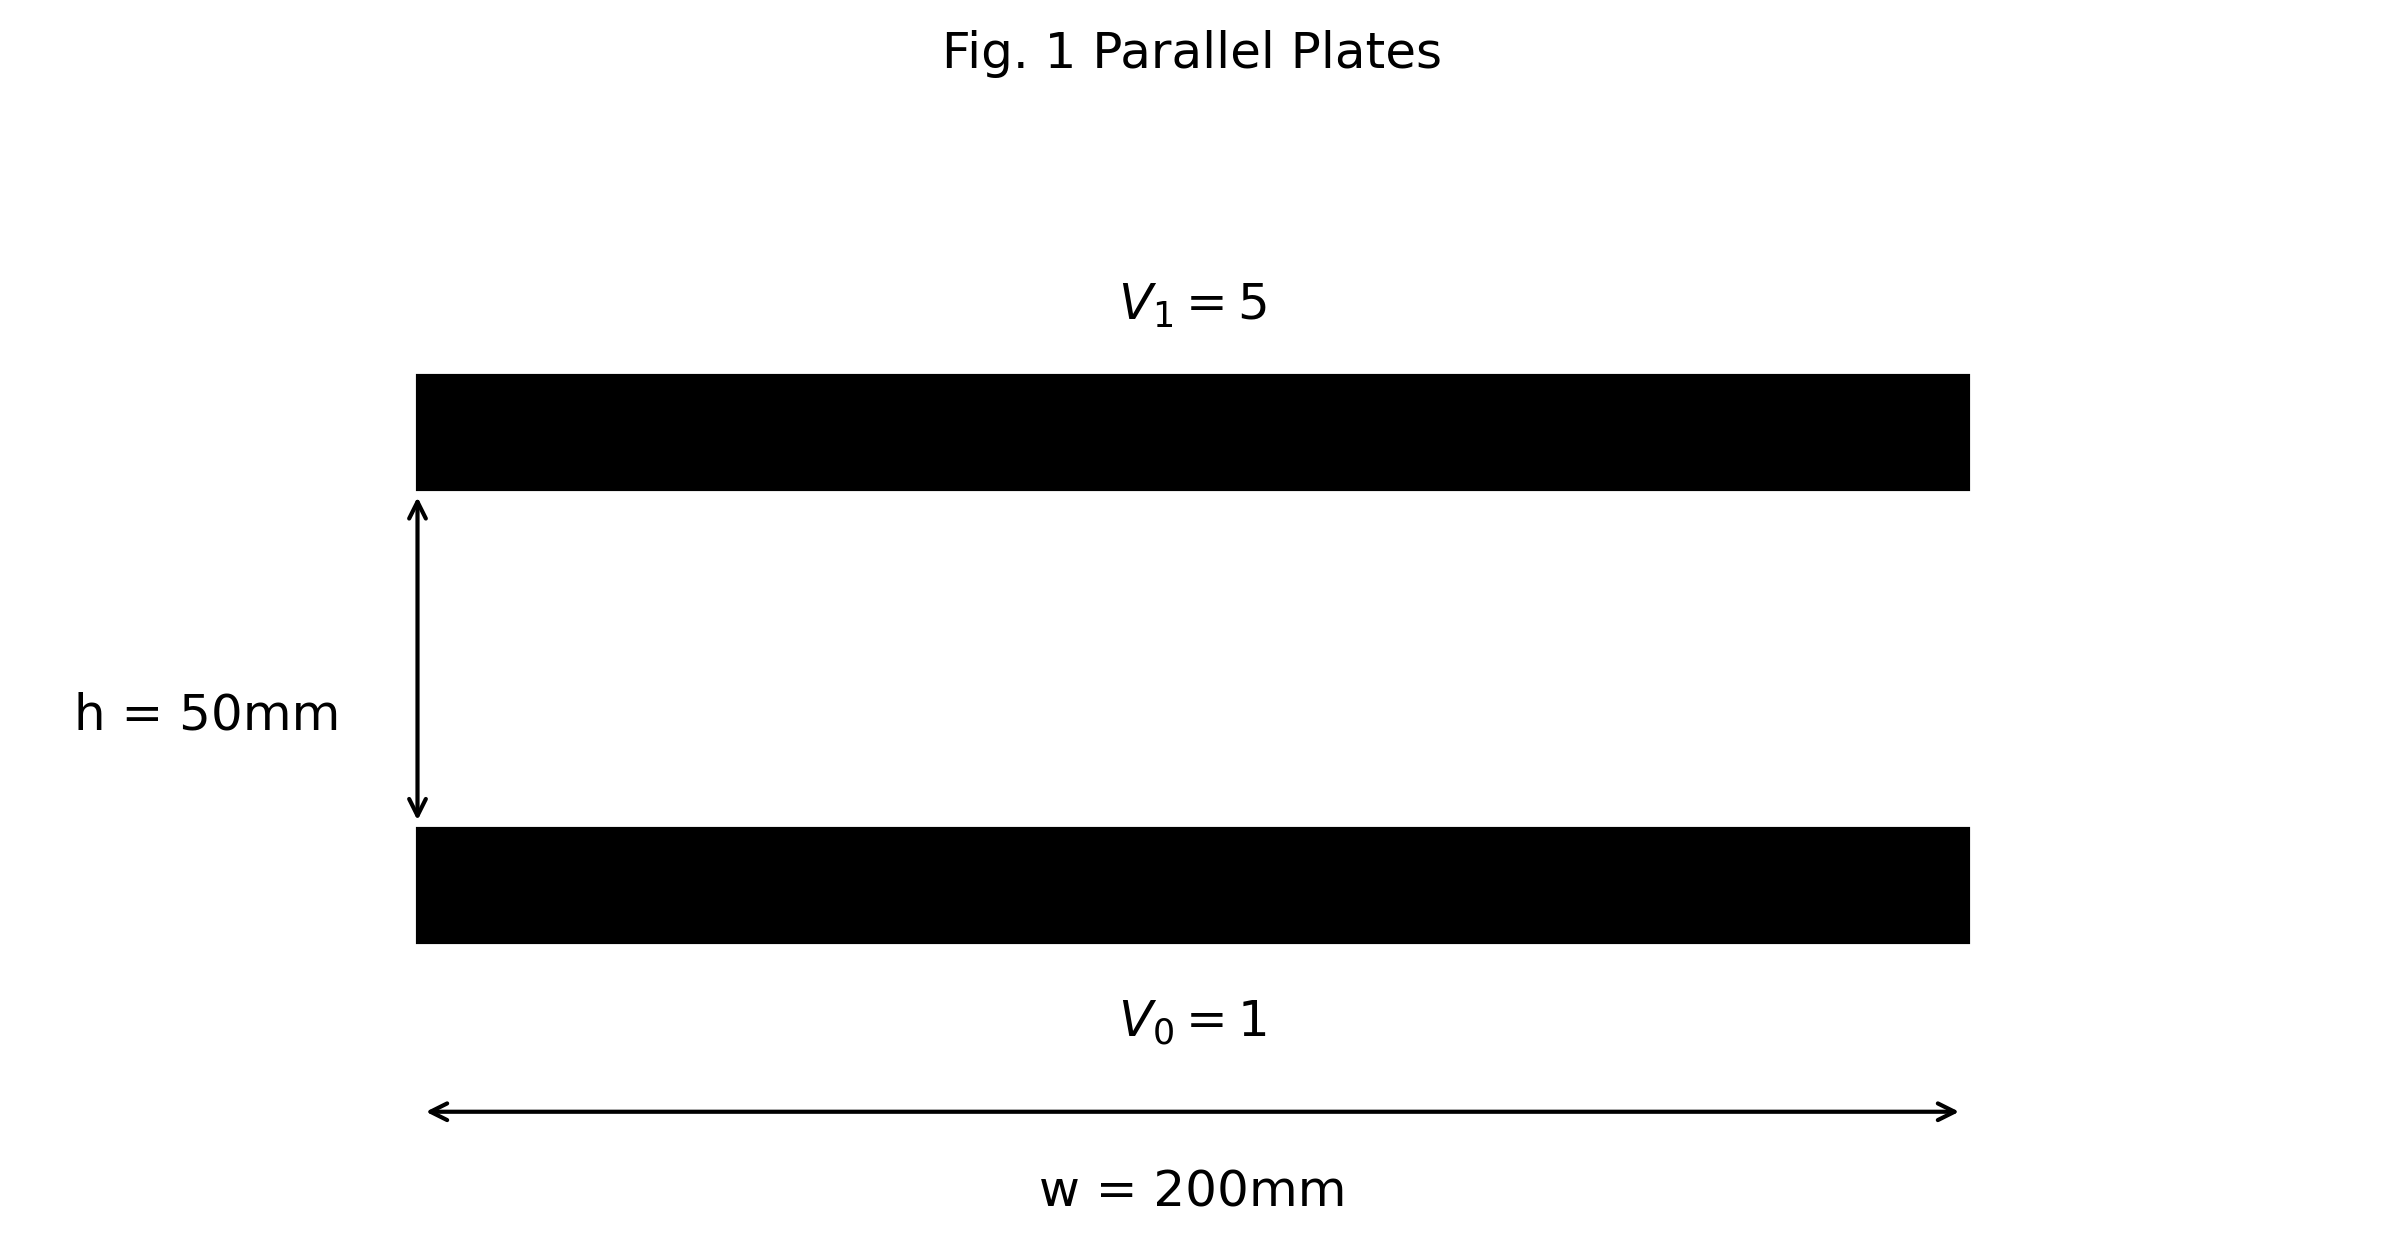

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the dimensions of the plate and the separation
plate_length = 2
plate_height = 0.1
separation = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Create rectangle patches
bottom_plate = patches.Rectangle((-plate_length/2, 0), plate_length, plate_height, 
                                 linewidth=1, edgecolor='black', facecolor='black')
top_plate = patches.Rectangle((-plate_length/2, separation), plate_length, plate_height, 
                              linewidth=1, edgecolor='black', facecolor='black')

# Add the rectangle patches to the Axes
ax.add_patch(bottom_plate)
ax.add_patch(top_plate)



# Add the separation line (d) and annotate the width and height
ax.annotate('', xy=(-plate_length/2, plate_height), xytext=(-plate_length/2, separation),
            arrowprops=dict(arrowstyle="<->", lw=1))
ax.text(-plate_length/2 - 0.1, separation/2, 'h = 50mm', va='center', ha='right', fontsize=12)

# Annotations for dimensions
# Width annotation
ax.annotate('', xy=(-plate_length/2, -0.15), xytext=(plate_length/2, -0.15),
            arrowprops=dict(arrowstyle="<->", lw=1))
ax.text(0, -0.2, 'w = 200mm', va='top', ha='center', fontsize=12)

# Annotate Voltages
ax.text(0, separation + plate_height + 0.05, r'$V_1 = 5$', ha='center', fontsize=12)
ax.text(0, -0.05, r'$V_0 = 1$', ha='center', va='top', fontsize=12)

# Set the limits of the plot
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.25, separation + plate_height + 0.25)

# Remove the axis
ax.axis('off')

# Title
plt.title('Fig. 1 Parallel Plates')

# Show the plot
plt.show()



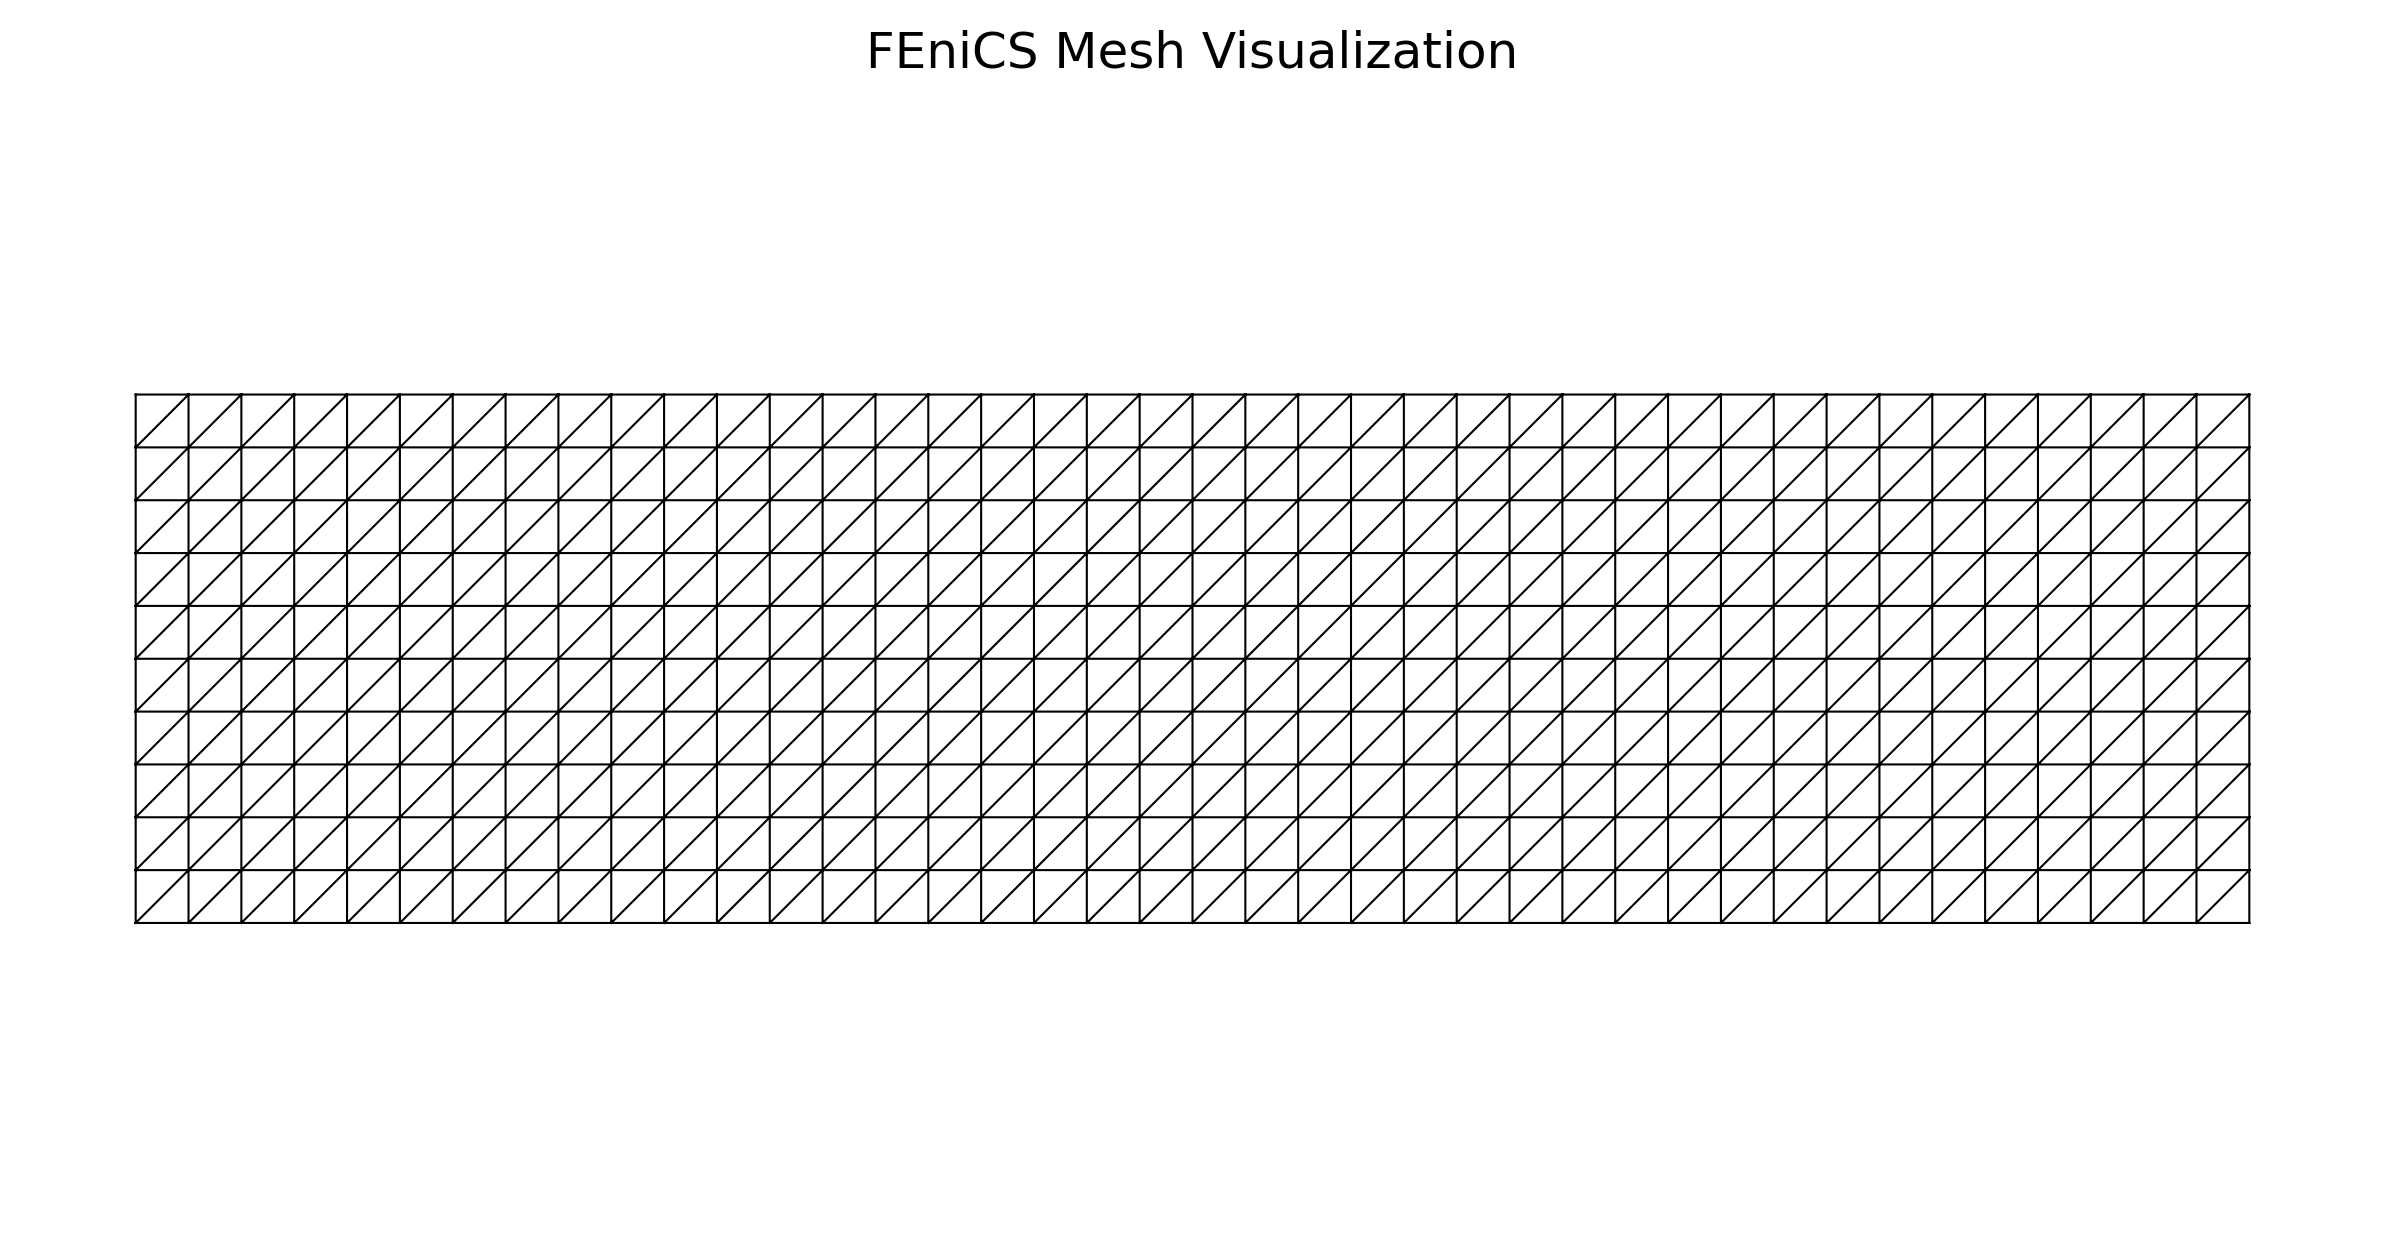

In [13]:
import fenics as fn
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# Define the dimensions of the mesh
box_width = 200
box_height = 50

# Create the mesh
mesh = fn.RectangleMesh(fn.Point(0, 0), fn.Point(box_width, box_height), 40, 10)
V = fn.FunctionSpace(mesh, 'P', 1)
# Create a matplotlib figure with high resolution
plt.figure(figsize=(10, 5), dpi=300)

# Extract the coordinates and triangles from the mesh
coordinates = mesh.coordinates()
triangles = mesh.cells()

# Create a Triangulation object from the mesh data
triangulation = tri.Triangulation(coordinates[:, 0], coordinates[:, 1], triangles)

# Plot the mesh using the Triangulation
plt.triplot(triangulation, 'k-', lw=0.5)

# Set plot title and labels
plt.title("FEniCS Mesh Visualization")
plt.xlabel("x")
plt.ylabel("y")

# Set equal aspect ratio
plt.axis('equal')

# Remove the axes
plt.axis('off')

# Save the figure

# Display the plot
plt.show()


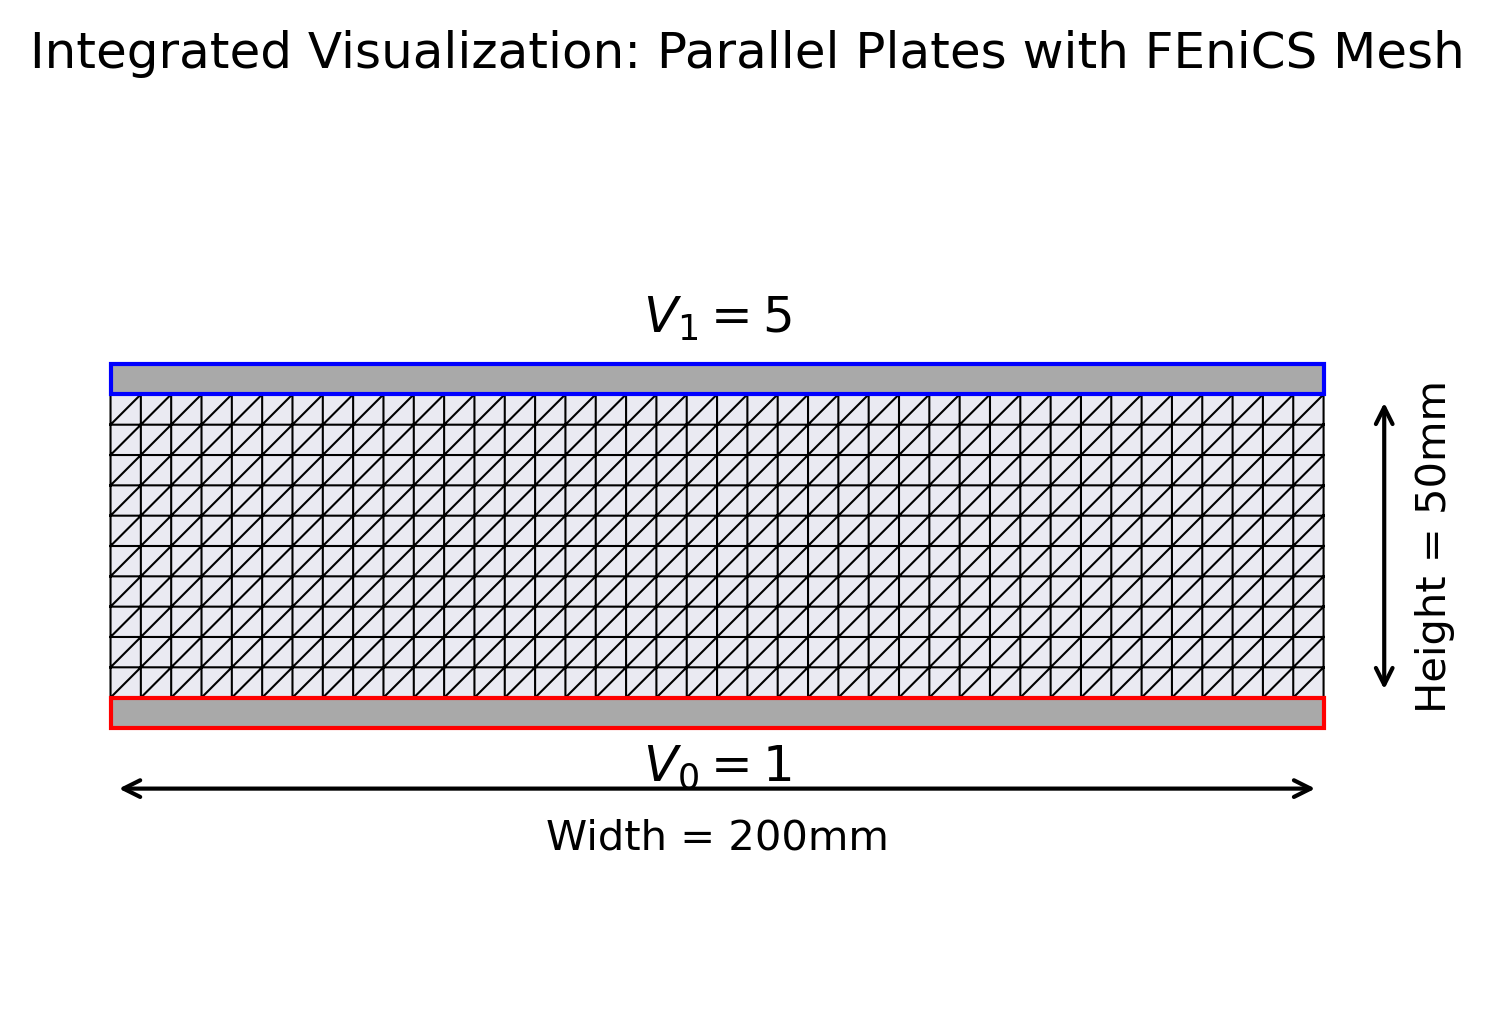

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.tri as tri
import fenics as fn
import numpy as np

# Define the dimensions for the mesh and plates
box_width = 200  # Width of the mesh, equivalent to the width of the plates
box_height = 50  # Height of the mesh, equivalent to the separation between plates

# Create the mesh
mesh = fn.RectangleMesh(fn.Point(0, 0), fn.Point(box_width, box_height), 40, 10)

# Create a figure for the visualization
plt.figure(figsize=(6, 4), dpi=300)
ax.set_facecolor('#eaeaf2')  # Set the background color
# Extract the coordinates and triangles from the mesh for plotting
coordinates = mesh.coordinates()
triangles = mesh.cells()
# Add a rectangle with the specific background color behind the mesh
plt.gca().add_patch(patches.Rectangle((0, 0), box_width, box_height, 
                                      linewidth=0, edgecolor=None, 
                                      facecolor='#eaeaf2'))
# Create a Triangulation object for the mesh data
triangulation = tri.Triangulation(coordinates[:, 0], coordinates[:, 1], triangles)

# Plot the mesh
plt.triplot(triangulation, 'k-', lw=0.5)

# Add rectangle patches to represent the parallel plates at top and bottom of the mesh
plt.gca().add_patch(patches.Rectangle((0, 0), box_width, -0.1 * box_height, 
                                      linewidth=1, edgecolor='r', facecolor='darkgray', label='Bottom Plate'))
plt.gca().add_patch(patches.Rectangle((0, box_height), box_width, 0.1 * box_height, 
                                      linewidth=1, edgecolor='b', facecolor='darkgray', label='Top Plate'))

# Annotations for dimensions

# Width annotation moved slightly down
plt.annotate('', xy=(0, -15), xytext=(box_width, -15),  # Adjusted y position for the width annotation
             arrowprops=dict(arrowstyle="<->", lw=1))
plt.text(box_width / 2, -20, f'Width = {box_width}mm', ha='center', va='top')  # Adjusted y position for the text


# Annotate Voltages
plt.text(100, box_height + plate_height + 10 , r'$V_1 = 5$', ha='center', fontsize=12)
plt.text(100, -7.5, r'$V_0 = 1$', ha='center', va='top', fontsize=12)

# Height annotation
plt.annotate('', xy=(box_width + 10, 0), xytext=(box_width + 10, box_height),
             arrowprops=dict(arrowstyle="<->", lw=1))
plt.text(box_width + 15, box_height / 2, f'Height = {box_height}mm', va='center', rotation='vertical')

# Set plot title and labels
plt.title("Integrated Visualization: Parallel Plates with FEniCS Mesh")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

# Set equal aspect ratio and adjust plot limits
plt.axis('equal')
plt.xlim(-10, box_width + 20)
plt.ylim(-15, box_height + 15)

# Remove the axes for a cleaner look
plt.axis('off')
plt.savefig('Figures/fenics_mesh_with_plates.eps', format='eps')

# Display the plot
plt.show()




In [15]:
import fenics as fn
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# Define the mesh and function space as before
# ...
V = fn.FunctionSpace(mesh, 'P', 1)
# Boundary conditions
v_1 = fn.Constant(5.0)
v_0 = fn.Constant(1.0)

def bottom_side(x, on_boundary):
    return fn.near(x[1], 0) and on_boundary

def top_side(x, on_boundary):
    return fn.near(x[1], box_height) and on_boundary

bot_bc = fn.DirichletBC(V, v_0, bottom_side)
top_bc = fn.DirichletBC(V, v_1, top_side)
bcs = [top_bc, bot_bc]

# Define variational problem
u = fn.TrialFunction(V)
v = fn.TestFunction(V)
f = fn.Constant(0)
a = fn.dot(fn.grad(u), fn.grad(v)) * fn.dx
L = f * v * fn.dx

# Compute solution
u = fn.Function(V)
fn.solve(a == L, u, bcs)

# Create a vector function space for the gradient
W = fn.VectorFunctionSpace(mesh, 'P', 1)

# Compute the gradient of the potential 'u'
E = -fn.grad(u)

# Project the gradient onto the vector function space
E_projected = fn.project(E, W)

# Extract the data for plotting the electric field
E_values = E_projected.compute_vertex_values(mesh)
E_magnitude = np.sqrt(np.sum(E_values**2, axis=0))  # Compute the magnitude of the electric field



Solving linear variational problem.


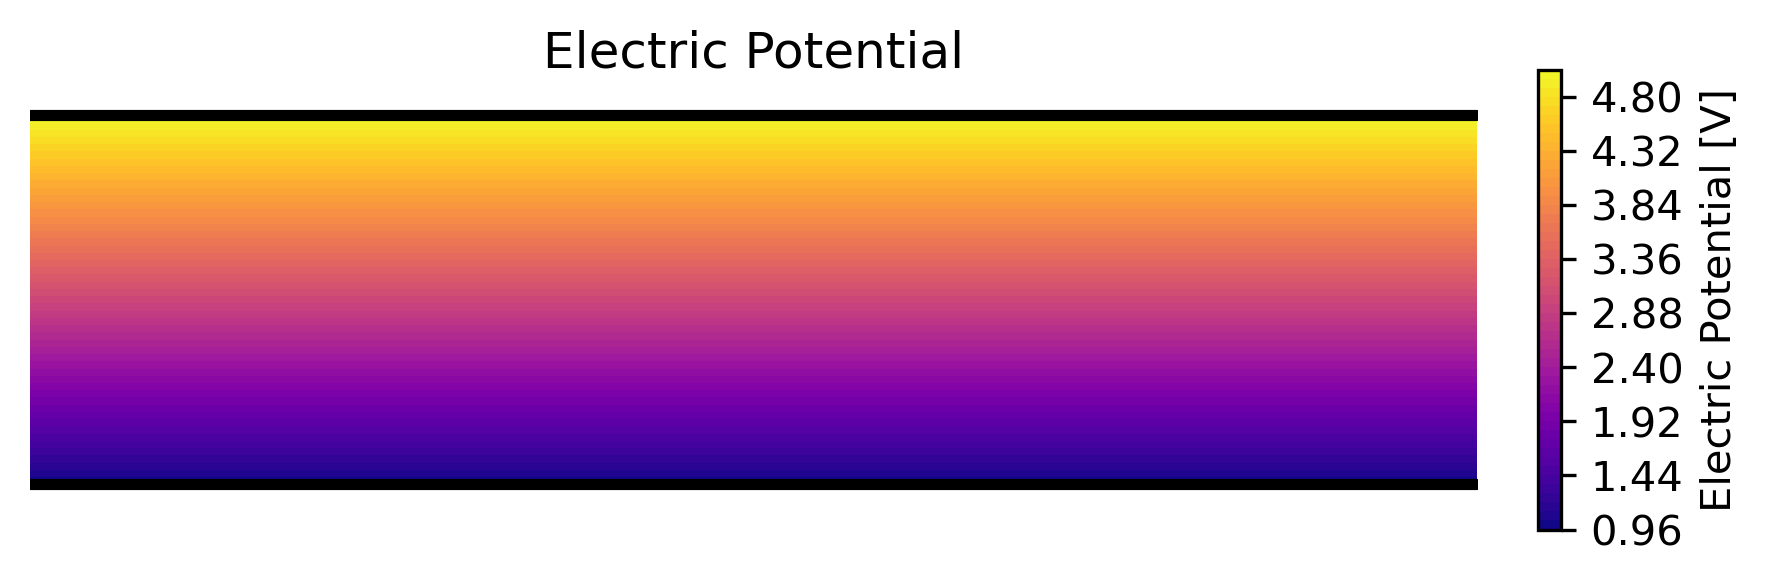

In [16]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib.colors as mcolors
import fenics as fn

# Extract the data for plotting
u_vertex_values = u.compute_vertex_values(mesh)
coordinates = mesh.coordinates()
triangulation = tri.Triangulation(coordinates[:, 0], coordinates[:, 1], mesh.cells())

# Define the dimensions for the mesh and plates
box_width = 200
box_height = 50
plate_height_fraction = 0.02 * box_height  # Make the plate height smaller for visualization purposes

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

# Set the background color for the plot area
ax.set_facecolor('#eaeaf2')  # Light gray background color

# Add a rectangle with the specific background color behind the mesh
ax.add_patch(patches.Rectangle((0, 0), box_width, box_height, 
                               linewidth=0, edgecolor=None, 
                               facecolor='#eaeaf2'))

# Create a contour plot of the electric potential on the mesh
contour = ax.tricontourf(triangulation, u_vertex_values, levels=56, cmap='plasma')

# Create colorbar
cbar = plt.colorbar(contour, ax=ax, fraction=0.015, pad=0.04)
cbar.set_label('Electric Potential [V]')

# Add the parallel plates to the plot
bottom_plate_y = 0
top_plate_y = box_height
ax.fill_between([0, box_width], bottom_plate_y - plate_height_fraction, bottom_plate_y, color='black')
ax.fill_between([0, box_width], top_plate_y, top_plate_y + plate_height_fraction, color='black')

# Add labels and title
ax.set_title('Electric Potential')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')

# Set equal aspect ratio
ax.set_aspect('equal')

# Turn off the axis (optional)
ax.axis('off')

# Adjust layout to minimize whitespace
fig.tight_layout()
plt.savefig('Figures/electric_potential.eps', format='eps')
# Show the plot
plt.show()




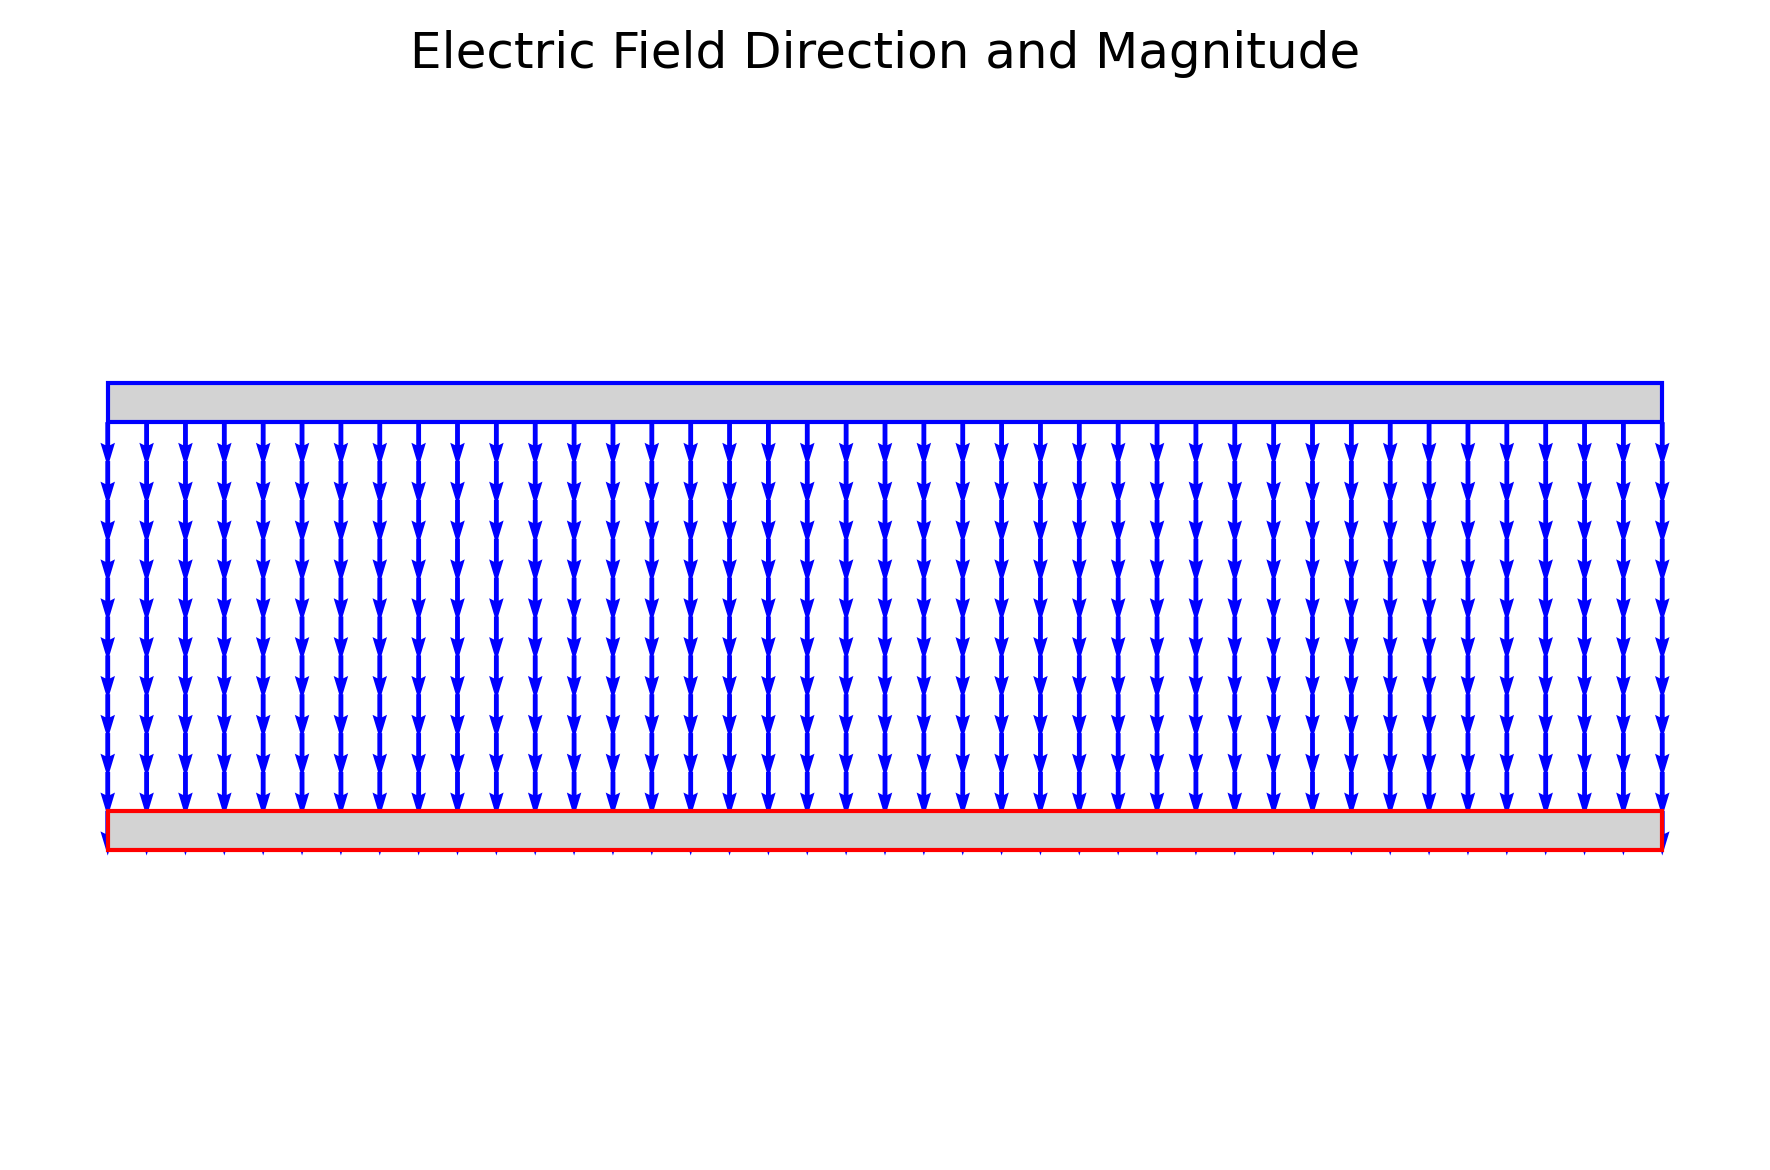

In [17]:
import fenics as fn
import matplotlib.pyplot as plt
import numpy as np

# Define the mesh and function space as before
# ...

# Compute the electric field as a vector function
E = -fn.grad(u)
E_projected = fn.project(E, fn.VectorFunctionSpace(mesh, 'P', 1))

# Extract the components of the electric field
E_x, E_y = E_projected.split(deepcopy=True)  # Use deepcopy to avoid modifying the original E_projected

# Convert the components to arrays
E_x_values = E_x.compute_vertex_values(mesh)
E_y_values = E_y.compute_vertex_values(mesh)

# Compute the magnitude and normalize the electric field components
magnitude = np.sqrt(E_x_values**2 + E_y_values**2)
E_x_values /= magnitude
E_y_values /= magnitude

# Coordinates for the quiver plot
coordinates = mesh.coordinates()
x = coordinates[:, 0]
y = coordinates[:, 1]

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import fenics as fn
import numpy as np

# Assuming 'mesh', 'u', and other necessary FEniCS components are already defined
# Reuse your electric field computation code here

# Create the plot
plt.figure(figsize=(6, 4), dpi=300)

# Set the background color
plt.gca().set_facecolor('#eaeaf2')

# Create a quiver plot for the electric field
plt.quiver(x, y, E_x_values, E_y_values, color='blue')  # Add color to the quiver plot if you like

# Add the parallel plates to the plot with adjusted dimensions and styles
bottom_plate_y = 0
top_plate_y = box_height
plate_height_fraction = 0.1 * box_height  # Adjusted for visualization

# Add rectangle patches to represent the parallel plates at top and bottom of the mesh
plt.gca().add_patch(patches.Rectangle((0, bottom_plate_y), box_width, -plate_height_fraction, 
                                      linewidth=1, edgecolor='r', facecolor='lightgray'))
plt.gca().add_patch(patches.Rectangle((0, top_plate_y), box_width, plate_height_fraction, 
                                      linewidth=1, edgecolor='b', facecolor='lightgray'))

# Add labels and title
plt.title('Electric Field Direction and Magnitude')
plt.xlabel('x')
plt.ylabel('y')

# Set the limits of the plot to the size of the domain
plt.xlim(0, box_width)
plt.ylim(bottom_plate_y - plate_height_fraction, top_plate_y + plate_height_fraction)

# Set equal aspect ratio
plt.axis('equal')

# Remove the axis for a cleaner look
plt.axis('off')

# Adjust the layout to fit the domain and colorbar
plt.tight_layout()

# Save the figure
plt.savefig('Figures/electric_field_direction_and_magnitude.eps', format='eps')

# Show the plot
plt.show()





In [18]:
# Extract the y-component of the electric field
E_y = E_projected.sub(1)

# Evaluate the electric field at the center of the domain
point = fn.Point(box_width / 2, box_height / 2)
E_y_at_center = E_y(point)

# Since the field should be constant, you can also compute the average of the y-component over the domain
E_y_average = fn.assemble(E_y * fn.dx) / fn.assemble(fn.Constant(1.0) * fn.dx(mesh))

print("Electric field (y-component) at the domain center: {:.4f} V/mm".format(E_y_at_center))
print("Average electric field (y-component) over the domain: {:.4f} V/mm".format(E_y_average))

# Compare with the analytical result
analytical_E_y = -0.08  # V/mm
print("Analytical electric field (y-component): {:.4f} V/mm".format(analytical_E_y))

# Compute the error
error_at_center = E_y_at_center  - analytical_E_y
error_average = E_y_average  - analytical_E_y

print("Error at domain center: {:.4f} V/mm".format(error_at_center))
print("Error in average: {:.4f} V/mm".format(error_average))


Electric field (y-component) at the domain center: -0.0800 V/mm
Average electric field (y-component) over the domain: -0.0800 V/mm
Analytical electric field (y-component): -0.0800 V/mm
Error at domain center: 0.0000 V/mm
Error in average: 0.0000 V/mm


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


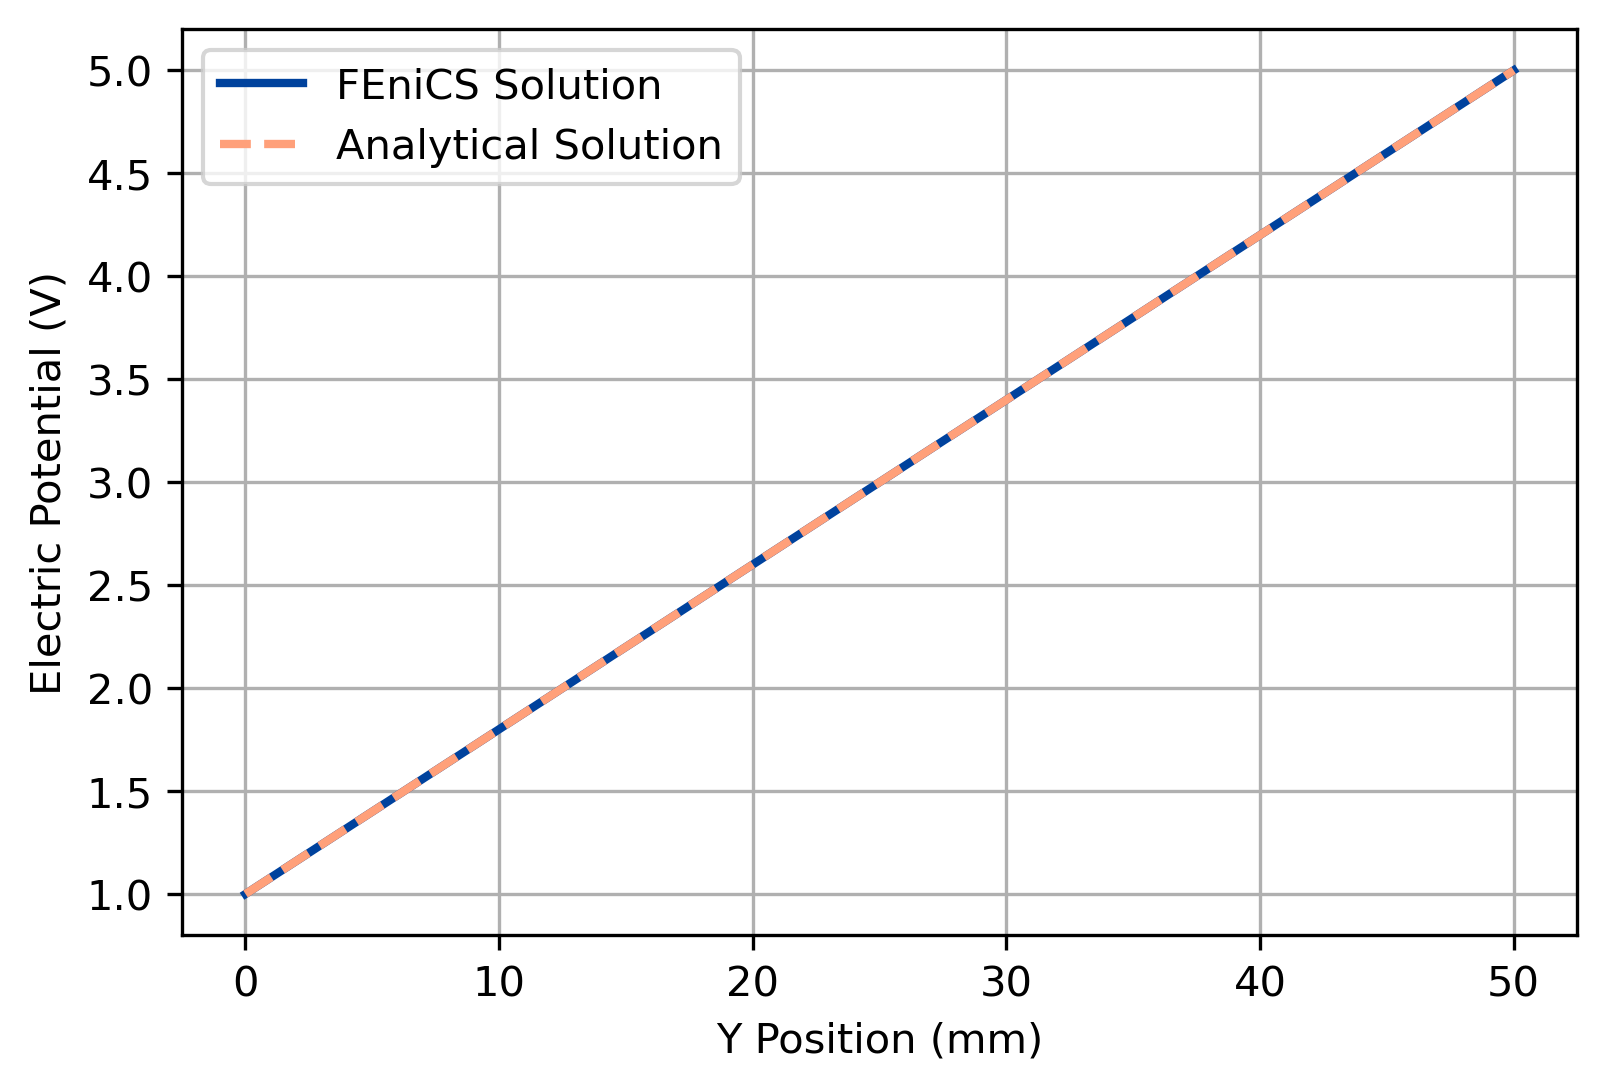

In [19]:
import numpy as np

# Define the line for extraction (x = constant, varying y)
x_value = 100  # Example: extract at the middle of the domain if width is 200
y_values = np.linspace(0, 50, 100)  # Assuming the height is 50, adjust accordingly
u_line = np.array([u(x_value, y) for y in y_values])
def parallel_plate(v0, v1, d, y):
    return (v1 - v0) / d * y + v0
import matplotlib.pyplot as plt

# Assuming fenics_data is u_line and y_values from the extraction step
fenics_data = np.column_stack((y_values, u_line))

# Plotting
plt.figure(figsize=(6, 4), dpi=300)

# FEniCS Solution
plt.plot(fenics_data[:, 0], fenics_data[:, 1], label='FEniCS Solution', color = '#00429d',linewidth=2)

# Analytical Solution
plt.plot(fenics_data[:, 0], parallel_plate(1, 5, 50, fenics_data[:, 0]), '--', label='Analytical Solution',color = '#ffa07a',linewidth=2)

plt.grid(True)
plt.xlabel("Y Position (mm)")
plt.ylabel("Electric Potential (V)")
plt.legend()
plt.savefig('Figures/fenics_vs_analytical.eps', format='eps', dpi=300)

plt.show()

